# Match COSMOS with DESY3 Deep Field

The inupt directories were retrieved from:

COSMOS 2015 (Laigle et al 2016) <br>
<i>/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits</i><br>

DES Deep Field Y3<br>
<i>/data/des70.a/data/annis/StellarMass-2021/y3_deep_fields.fits</i><br>

For more information: https://cdcvs.fnal.gov/redmine/projects/des-sci-release/wiki/Y3_deep_fields_cat


In [1]:
import esutil
import numpy as np
import os
import esutil

In [2]:
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

In [320]:
#image path
path = '../graphs/'

# Loading the deep fields

In [4]:
des_deep_field_infile = '/data/des70.a/data/annis/StellarMass-2021/y3_deep_fields.fits'
des0 = Table(getdata(des_deep_field_infile))

In [5]:
des0

ID,RA,DEC,TILENAME,MAG_U,MAG_G,MAG_R,MAG_I,MAG_Z,MAG_J,MAG_H,MAG_KS,MAGERR_U,MAGERR_G,MAGERR_R,MAGERR_I,MAGERR_Z,MAGERR_J,MAGERR_H,MAGERR_KS,BDF_FRACDEV,BDF_T,BDF_T_RATIO
int64,float64,float64,str32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
692016671,52.004214999999995,-28.000093,SN-C3_C26,26.1941253280812,24.9959243415065,24.9361152402901,24.9678749166613,24.5704519788764,24.5544593350045,23.9643458849102,23.4578471128541,0.327994680956943,0.0682083057098865,0.0800793408437564,0.117909846059694,0.153732238634536,0.0619439539012224,0.0590109366609468,0.0514384008090265,0.52049575504551,0.608481477457793,0.835835698493977
692016672,51.977779999999996,-27.999786,SN-C3_C26,25.4199912180478,25.3984889909989,25.1454392728965,24.8045537557133,24.2230809598576,23.7257869790259,23.6056042292541,23.4915803554274,0.1426550029156,0.0603848422534971,0.0676505041960723,0.0768871785124578,0.0873411165232766,0.190843114584784,0.230762672906638,0.261967983051327,0.499980331321826,0.0547831137460798,0.0751258463597854
692016673,51.814443,-28.004469,SN-C3_C26,21.1357647309935,20.4861456515528,19.5316725252753,19.149476985606,18.8427599626576,18.4200486173287,18.1614187893385,17.9136563197699,0.015421665672099,0.00422281923495345,0.00310097908645819,0.00347160222664796,0.00454692302624948,0.0650625171494162,0.0553753748831547,0.038095040760989,9.43911615536308e-13,2.58558469660883,3.47311151779601
692016674,51.805471999999995,-27.999744,SN-C3_C26,26.5295419728803,26.2042659278795,25.9944848432716,26.331231703522,25.4576940026754,25.9626292751767,24.9886806530976,24.418212791245,0.409107813870488,0.134358323132623,0.149789628105161,0.278180483061203,0.250810810884531,0.512063160552519,0.299384711695278,0.230631528896287,0.500182062309831,0.0435887552328438,0.0583073232246856
692016675,52.046735,-27.999821999999998,SN-C3_C26,23.9691403568646,24.1213463592718,24.1486381177255,24.083406465751,23.9468199661688,23.635252910393,23.8797220665512,23.4783142916573,0.050628057487446,0.0258945700549933,0.0328004631627133,0.0470410870243525,0.0773918677147558,0.0478916794361528,0.088866712395557,0.0831659191590529,0.339821728939668,0.202119844317184,0.281798754644895
692016676,52.090387,-27.999854,SN-C3_C26,25.489750988975,25.4075176687297,24.3766272554401,23.9217356118972,23.6823774467326,23.016395717424,22.9853867626932,22.8210335909338,0.218661831604687,0.0970223595869377,0.0686419939961237,0.0727575326271568,0.0986918825245015,0.284527362164376,0.370001702978352,0.433394064393124,0.223237992574445,0.993344582639354,1.38294048340879
692016677,51.902096,-27.999879999999997,SN-C3_C26,26.2697152233747,26.171561782232,26.1780200141698,25.9309239255249,25.5424903388733,-9999000000.0,-9999000000.0,-9999000000.0,0.338852473750032,0.181044300270754,0.21748692303725,0.260035097318754,0.323586600644468,9999000000.0,9999000000.0,9999000000.0,0.492700114393274,0.227324666568336,0.306446934240328
692016678,51.914114,-27.999893,SN-C3_C26,25.6611775161731,25.371181563066,25.0197002501602,24.9028511686628,24.3262813428721,-9999000000.0,-9999000000.0,-9999000000.0,0.198886605626478,0.075864074912921,0.07797397930973,0.104618350205324,0.117904269557974,9999000000.0,9999000000.0,9999000000.0,0.473157517745584,0.230478453008924,0.311649539453295
692016679,51.957259,-27.999854,SN-C3_C26,25.593620356666,24.9955564192886,24.5060629533044,24.4802814402345,24.4400173961539,24.5710021966435,23.6386490251344,23.6355676767168,0.17651886890159,0.0491951647712722,0.0466037139660495,0.0670642929847768,0.113439745152806,0.538959043873964,0.409251915521266,0.573291494787366,0.433941307957469,0.155853659709346,0.212879062199463


In [6]:
patch = (des0['RA']>140)&(des0['DEC']>0)
des   = des0[patch]

In [7]:
cosmo_infile = '/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits'
cosmo0  = Table(getdata(cosmo_infile))

In [8]:
cosmo0

ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLAG_HJMCC,FLUX_RADIUS,KRON_RADIUS,EBV,FLAG_PETER,FLAG_COSMOS,FLAG_DEEP,FLAG_SHALLOW,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Ks_FLAGS,Ks_IMAFLAGS_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,Y_FLAGS,Y_IMAFLAGS_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,H_FLAGS,H_IMAFLAGS_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,J_FLAGS,J_IMAFLAGS_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,B_FLAGS,B_IMAFLAGS_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,V_FLAGS,V_IMAFLAGS_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,ip_FLAGS,ip_IMAFLAGS_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,r_FLAGS,r_IMAFLAGS_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,u_FLAGS,u_IMAFLAGS_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zp_FLAGS,zp_IMAFLAGS_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,zpp_FLAGS,zpp_IMAFLAGS_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA484_FLAGS,IA484_IMAFLAGS_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA527_FLAGS,IA527_IMAFLAGS_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA624_FLAGS,IA624_IMAFLAGS_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA679_FLAGS,IA679_IMAFLAGS_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA738_FLAGS,IA738_IMAFLAGS_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IA767_FLAGS,IA767_IMAFLAGS_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB427_FLAGS,IB427_IMAFLAGS_ISO,IB464_FLUX_APER2,IB464_FLUXERR_APER2,IB464_FLUX_APER3,IB464_FLUXERR_APER3,IB

In [9]:
cosmo0.colnames

['ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO',
 'H_MAGERR_ISO',
 'H_FLAGS',
 'H_IMAFLAGS_ISO',
 'J_FLUX_APER2',
 'J_FLUXERR_APER2',


# Preparing To Sky Match 

In [10]:
nsize = {'cosmo':len(cosmo0),'des':len(des)}

In [11]:
nsize['cosmo'], nsize['des']

(1182108, 709987)

In [132]:
indices= np.arange(len(cosmo0),dtype=np.int)
mycols = ['ALPHA_J2000','DELTA_J2000','r_MAG_AUTO']

TypeError: object of type 'int' has no len()

In [13]:
indices

array([      0,       1,       2, ..., 1182105, 1182106, 1182107])

In [14]:
match = cosmo0[mycols]
match['ID'] = indices
match.rename_column('ALPHA_J2000','RA')
match.rename_column('DELTA_J2000','DEC')

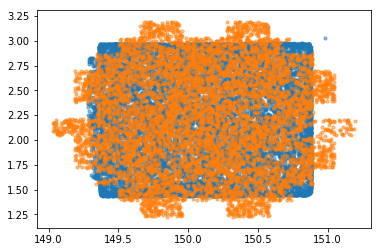

In [15]:
plt.scatter(match[::100]['RA'],match[::100]['DEC'],s=10,alpha=0.5)
plt.scatter(des[::100]['RA'],des[::100]['DEC'],s=10,alpha=0.5)

In [16]:
match

RA,DEC,ID
float64,float64,int64
149.68318763276815,1.4354018133896047,0
149.6866381780836,1.4354525227506005,1
149.67109752619135,1.4354506867590184,2
149.69751106098735,1.4354887680463875,3
149.6805331339998,1.4354870618513438,4
149.6946928828636,1.4354795137759895,5
149.6655271567776,1.435461597929882,6
149.72351594321586,1.435540006600698,7
149.7066535453756,1.4355378982060971,8


In [17]:
indices.size/1e6

1.182108

In [18]:
len(des)/1e6

0.709987

In [19]:
cosmo0 = 0

# Sky Match 

Using the latest and fatest code to match sky positions, smatch https://github.com/esheldon/smatch. It's an updated idea of the HTM. <br>

to install:
pip3 install smatch --user or !pip install git+git://github.com/esheldon/smatch

In [270]:
## Old Code - 10 times slower
def match_sky_coordinates(ra0,dec0,ra1,dec1,sep=1/60/60):
    depth=10
    h=esutil.htm.HTM(depth)
    #Inner match
    m1i,m2i,disti=h.match(ra0,dec0,ra1,dec1,radius=sep,maxmatch=1)
    return [m1i,m2i,disti]

In [23]:
#id0, id1, dist = match_sky_coordinates(ra0,dec0,ra1,dec1,sep=1/60/60)

In [21]:
ra1 = des['RA']#[::5]
dec1= des['DEC']#[::5]

In [22]:
ra2 = match['RA']
dec2= match['DEC']

In [190]:
import smatch

nside=4096 # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches0 = smatch.match(ra1, dec1, 10./3600, ra2, dec2, nside=nside, maxmatch=maxmatch)

#des_matched = des[matches['i1']]
#cos_matched = match[matches['i2']]

In [191]:
dist = np.sqrt((des_matched['RA']-cos_matched['RA'])**2+(des_matched['DEC']-cos_matched['DEC'])**2)*3600

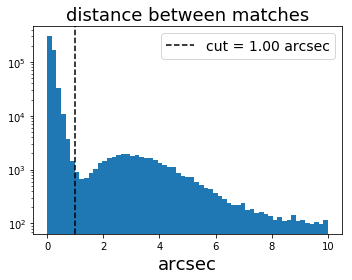

In [325]:
plt.figure(figsize=(5,4))
_ = plt.hist(dist,bins=61)
plt.axvline(1,ls='--',color='k',label='cut = %.2f arcsec'%(1.0))
plt.yscale('log')
plt.xlabel('arcsec',fontsize=18)
plt.legend(fontsize=14)
plt.title('distance between matches',fontsize=18)
plt.tight_layout()
plt.savefig(path+'match_distance.png')

In [196]:
perc = np.linspace(1,99.8,300)
dperc= np.percentile(dist,perc)

Text(0.5,0,'distance [arcesc]')

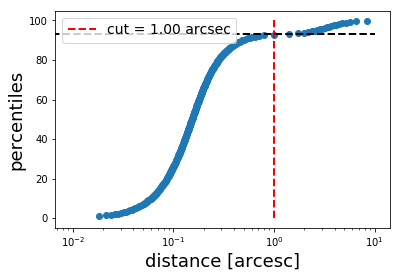

In [268]:
plt.scatter(dperc,perc)
plt.plot([1.,1.],[0,100],'r--',lw=2,label='cut = %.2f arcsec'%(1.0))
plt.plot([0.,10],[93,93],'k--',lw=2,label='_no_')
plt.xscale('log')
plt.legend(fontsize=14)
plt.ylabel('percentiles',fontsize=18)
plt.xlabel('distance [arcesc]',fontsize=18)

In [199]:
## Second match, with one arcsec

In [297]:
cat=smatch.Catalog(ra1, dec1, 1./3600, nside=nside)
print(cat)

cat.match(ra2, dec2, maxmatch=maxmatch)

print("found:",cat.nmatches,"matches")
matches = cat.matches

smatch catalog
    nside:               4096
    pixel area (sq deg): 0.000205
    npoints:             709987
('found:', 522703, 'matches')


In [298]:
nmatch0 = np.setdiff1d(range(nsize['des']), matches0['i1'])
nmatch1 = np.setdiff1d(range(nsize['des']), matches['i1'])

In [299]:
des['COSMO'] = False
des['COSMO'][matches0['i1']] = True

In [300]:
des['COSMO_1arcsec'] = False
des['COSMO_1arcsec'][matches['i1']] = True

In [301]:
def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [302]:
mag = np.array(des['MAG_I'])

In [315]:
dm     = 1./2
mbins  = np.arange(18,30+dm,dm)
keys,mb= makeBins(mag,mbins)

In [316]:
def compute_fraction_matched(mask,indices):
    return 1.*np.count_nonzero(mask[indices])/len(indices)

In [317]:
fm0 = [compute_fraction_matched(des['COSMO'],idx) for idx in keys]
fm1 = [compute_fraction_matched(des['COSMO_1arcsec'],idx) for idx in keys]

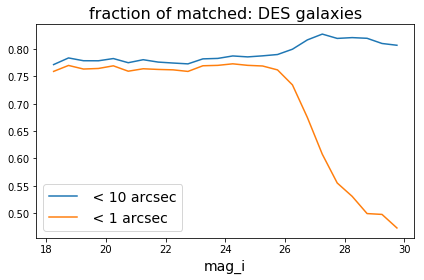

In [326]:
plt.plot(mb,fm0,label=' < 10 arcsec')
plt.plot(mb,fm1,label=' < 1 arcsec')
plt.legend(fontsize=14)
plt.xlabel('mag_i',fontsize=14)
plt.title('fraction of matched: DES galaxies',fontsize=16)
plt.tight_layout()
plt.savefig(path+'matched_frac_des_gals.png')

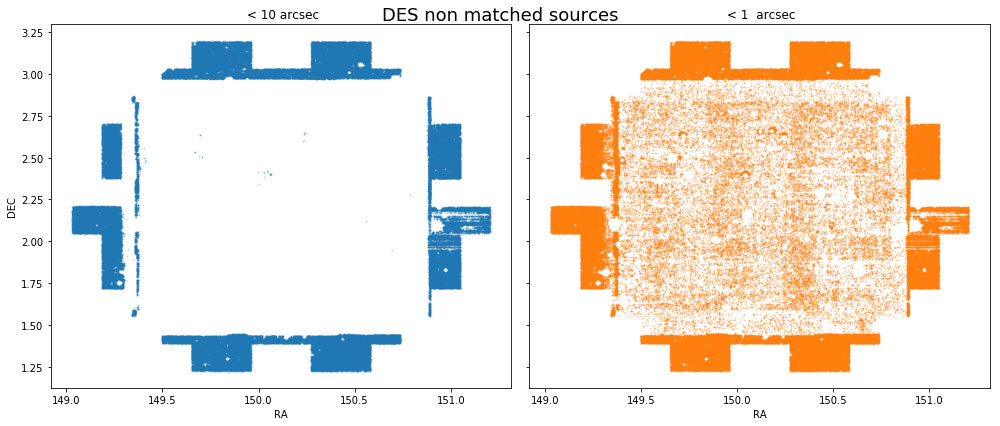

In [331]:
fig, axis = plt.subplots(1, 2, figsize=(14,6), sharex='all',sharey='all')

axis[0].scatter(des['RA'][nmatch0],des['DEC'][nmatch0],s=1,alpha=0.2)
axis[1].scatter(des['RA'][nmatch1],des['DEC'][nmatch1],s=1,alpha=0.2,color='tab:orange')

axis[1].set_xlabel('RA')
axis[0].set_xlabel('RA')
axis[0].set_ylabel('DEC')

axis[0].set_title(' < 10 arcsec')
axis[1].set_title(' < 1  arcsec')

fig.suptitle('DES non matched sources',fontsize=18)
fig.tight_layout()
plt.savefig(path+'non_matched_sky_plot.png')

In [314]:
1.*matches0['i2'].size/nsize['cosmo']

0.47616715223989686